In [ ]:
import tensorflow as tf

from tensorflow.keras import models,layers

import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 816.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0


# Loading and Reading Data

In [ ]:
image_size = 100

batch_size = 32

channels = 3

epochs = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/fruits_village/fruits_village.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits village/Tomato 3/r2_247_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_248_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_249_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_250_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_251_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_252_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_253_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_254_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_255_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_256_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_257_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_258_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_259_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_260_100.jpg  
  inflating: /content/fruits village/Tomato 3/r2_261_100.jpg  
  in

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/fruits village",
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

Found 70491 files belonging to 141 classes.


In [ ]:
class_names = dataset.class_names

class_names

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple hit 1',
 'Apricot 1',
 'Avocado 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Beetroot 1',
 'Blueberry 1',
 'Cabbage white 1',
 'Cactus fruit 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Carrot 1',
 'Cauliflower 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Chestnut 1',
 'Clementine 1',
 'Cocos 1',
 'Corn 1',
 'Corn Husk 1',
 'Cucumber 1',
 'Cucumber 3',
 'Cucumber Ripe 1',
 'Cucumber Ripe 2',
 'Dates 1',
 'Eggplant 1',
 'Eggplant long 1',
 'Fig 1',
 'Ginger Root 1',
 'Granadilla 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(dataset)

2203

In [ ]:
for image_batch , label_batch in dataset.take(1):

    print(image_batch.shape)

    print(label_batch.numpy())

(32, 100, 100, 3)
[ 48  22   7  50  42  96  82 125   4  48  98  86  16  88 112 128  60  53
  13 126  22  31  50  60  94 110  28  15  80  70  28  62]


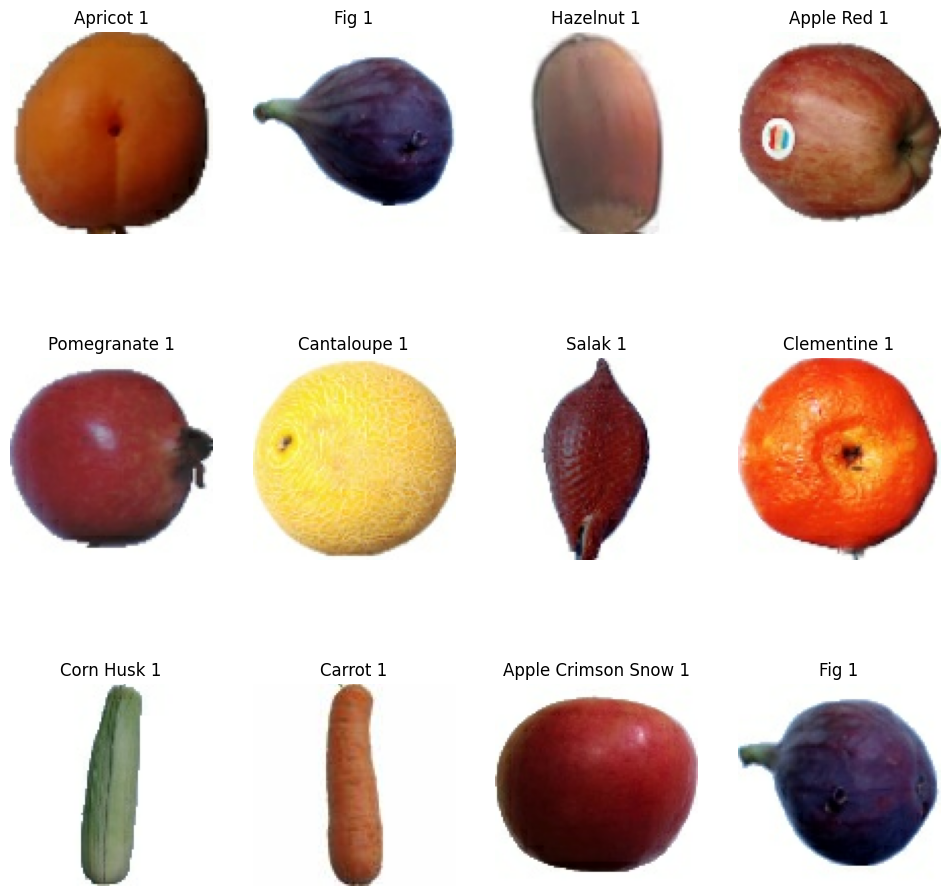

In [ ]:
plt.figure(figsize=(12,12))

for image_batch , label_batch in dataset.take(1):

  for i in range(12) :

    ax = plt.subplot(3,4,i+1)

    plt.title(class_names[label_batch[i]])

    plt.imshow(image_batch[i].numpy().astype('uint8'))

    plt.axis('off')



In [ ]:
#80% ==> training

#20% ==> 10% validation , 10% test

In [ ]:
train_size = 0.8

len(dataset)*train_size




1762.4

In [ ]:
train_ds = dataset.take(1762)

In [ ]:
test_ds = dataset.skip(1762)

In [ ]:
val_size = 0.1

len(dataset)*val_size

220.3

In [ ]:
val_ds = dataset.take(220)

In [ ]:
test_ds = dataset.skip(220)

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split = 0.1 , test_split = 0.1,shuffle=True , shuffle_size = 10000):

    ds_size = len(ds)



    if shuffle :

        ds = ds.shuffle(shuffle_size , seed = 12)



    train_size = int(train_split*ds_size)

    val_size = int(val_split*ds_size)





    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)

    test_ds = ds.skip(train_size).skip(val_size)



    return train_ds , val_ds , test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

1762

In [ ]:
len(val_ds)

220

In [ ]:
len(test_ds)

221

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Data Augmentation and Rescaling

In [ ]:
resize_and_rescale = tf.keras.Sequential([

    layers.Resizing(image_size,image_size),

    layers.Rescaling(1.0/255)

])

In [ ]:
data_augmentation = tf.keras.Sequential([

    layers.RandomFlip("horizontal_and_vertical"),

    layers.RandomRotation(0.2)

])

# Model Building

In [ ]:
n_classes = 141

image_size = 100

channels =3

input_shape = (batch_size,image_size , image_size, channels)

model = models.Sequential([



    layers.InputLayer(input_shape=(image_size, image_size, channels)),



    resize_and_rescale ,

    data_augmentation ,



    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),

    layers.MaxPooling2D((2, 2)),



    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

    layers.MaxPooling2D((2, 2)),



    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

    layers.MaxPooling2D((2, 2)),



    # Stopping additional pooling layers to prevent size reduction too much

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),



    # Add GlobalAveragePooling to avoid too many size reductions

    layers.GlobalAveragePooling2D(),



    layers.Flatten(),



    layers.Dense(64, activation='relu'),

    layers.Dense(n_classes, activation='softmax'),

])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                 

In [ ]:
model.compile(

    optimizer ='adam',

    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),

    metrics=['accuracy']

)

In [ ]:
history = model.fit(train_ds,

                    epochs=epochs,

                    batch_size=batch_size,

                    verbose=1,

                    validation_data=val_ds

                   )

Epoch 1/30
1762/1762 [==============================] - 119s 65ms/step - loss: 1.4589 - accuracy: 0.5831 - val_loss: 0.5263 - val_accuracy: 0.8287
Epoch 2/30
1762/1762 [==============================] - 111s 63ms/step - loss: 0.4258 - accuracy: 0.8534 - val_loss: 0.4922 - val_accuracy: 0.8338
Epoch 3/30
1762/1762 [==============================] - 108s 62ms/step - loss: 0.2862 - accuracy: 0.9026 - val_loss: 0.2344 - val_accuracy: 0.9187
Epoch 4/30
1762/1762 [==============================] - 109s 62ms/step - loss: 0.2088 - accuracy: 0.9282 - val_loss: 0.1984 - val_accuracy: 0.9284
Epoch 5/30
1762/1762 [==============================] - 106s 60ms/step - loss: 0.1685 - accuracy: 0.9428 - val_loss: 0.1627 - val_accuracy: 0.9477
Epoch 6/30
1762/1762 [==============================] - 108s 61ms/step - loss: 0.1455 - accuracy: 0.9517 - val_loss: 0.0530 - val_accuracy: 0.9827
Epoch 7/30
1762/1762 [==============================] - 110s 63ms/step - loss: 0.1254 - accuracy: 0.9584 - val_loss: 0

In [ ]:
scores = model.evaluate(test_ds)

221/221 [==============================] - 6s 17ms/step - loss: 0.0036 - accuracy: 0.9984


In [ ]:
scores

[0.0035672392696142197, 0.9984445571899414]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1762}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

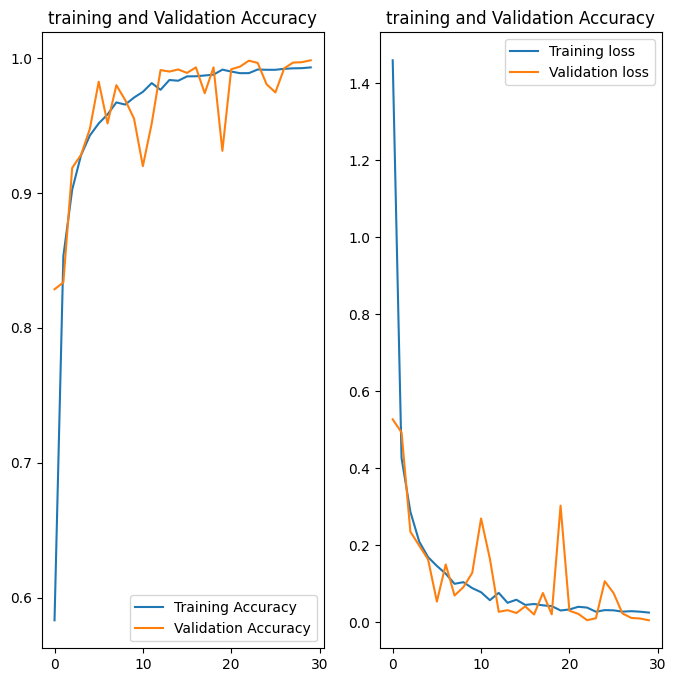

In [ ]:
# plotting accuracy plot
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title("training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training loss')
plt.plot(range(epochs),val_loss, label = 'Validation loss')
plt.legend(loc='upper right')
plt.title("training and Validation Accuracy")
plt.show()

First Image of Test Batch
actual label : Grapefruit Pink 1
1/1 [==============================] - 0s 136ms/step
Predicted label : Grapefruit Pink 1


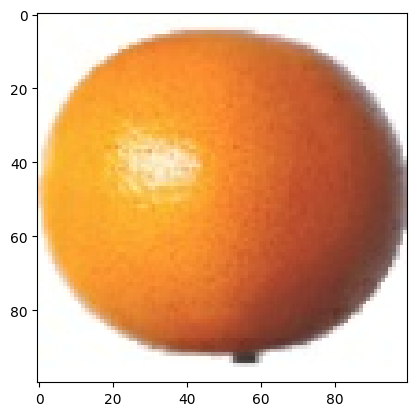

In [ ]:
import numpy as np
for image_batch , labels_batch in test_ds.take(1) :
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image of Test Batch")
    plt.imshow(first_image)
    print(f'actual label : {class_names[first_label]}')


    predicted_label = model.predict(image_batch)

    print(f'Predicted label : {class_names[np.argmax(predicted_label[0])]}')

In [ ]:
def predict(model,img) :
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 26ms/step


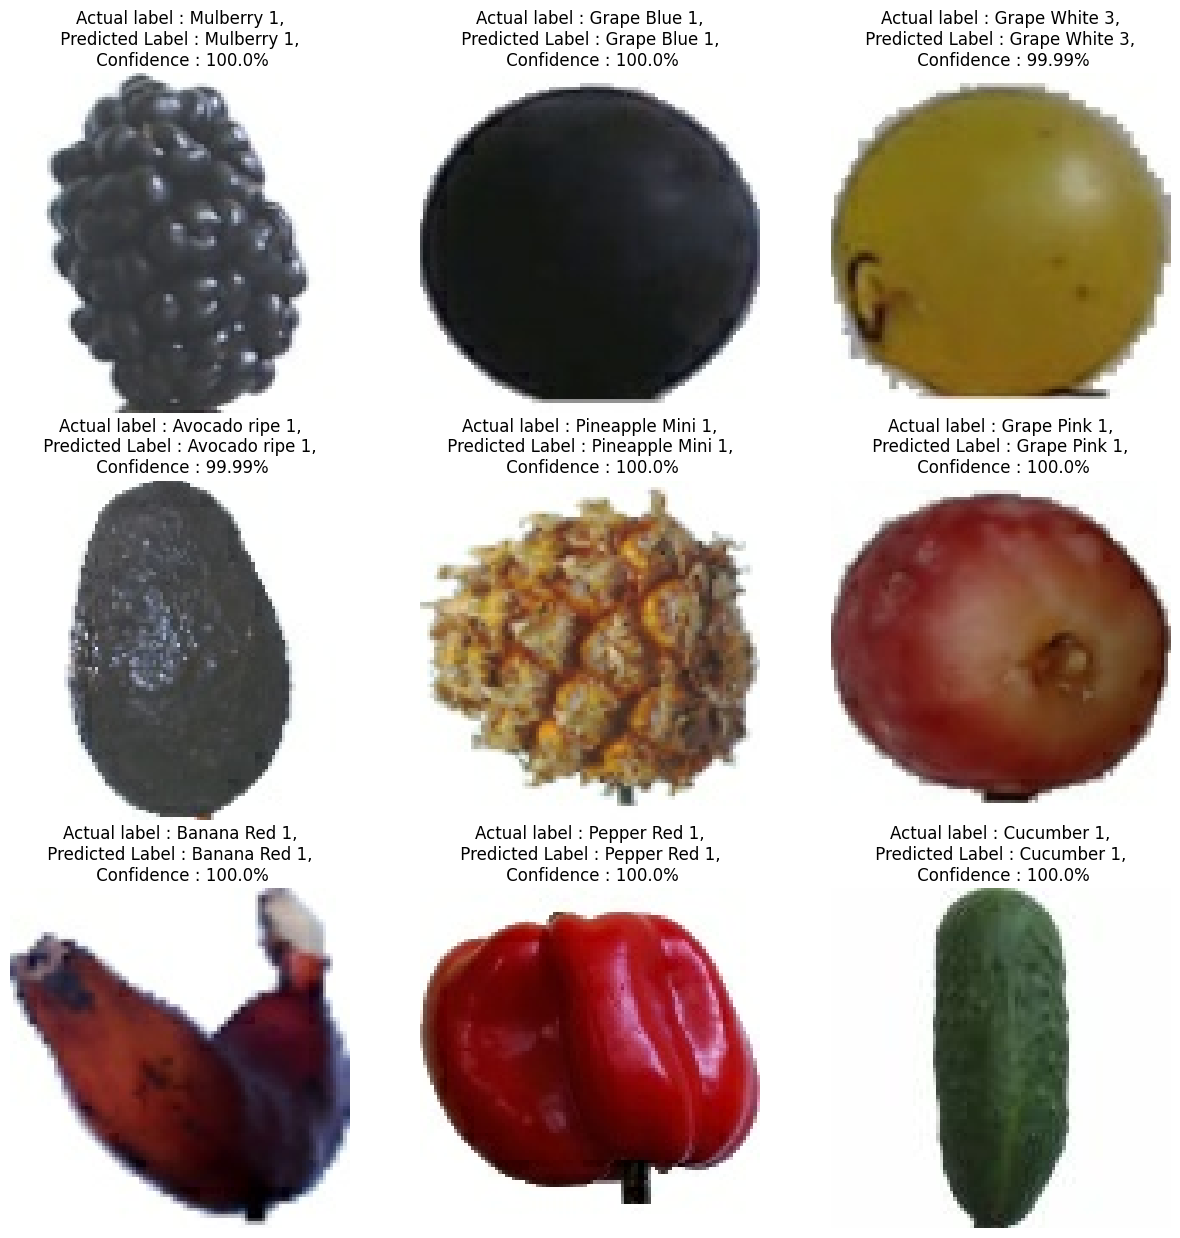

In [ ]:
plt.figure(figsize=(15,15))
for images ,labels in test_ds.take(1) :
    for i in range(9) :
        ax = plt.subplot(3,3,i+1)

        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual label : {actual_class},\n Predicted Label : {predicted_class}, \n Confidence : {confidence}%")
        plt.axis("off")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_version = 2
model.save(f"/content/drive/MyDrive/models/model_version_{model_version}.keras")